## Perturbation of sequences
### Dataset: WIV04 
### Number of sequences = 
### Model: VirProBERT (CoV-S-UniRef90, CoV-S-UniRef90-aligned) 

In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path.append(os.path.join(os.getcwd(), ".."))
sys.path

['/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/perturbation/wiv04',
 '/opt/conda/lib/python38.zip',
 '/opt/conda/lib/python3.8',
 '/opt/conda/lib/python3.8/lib-dynload',
 '',
 '/home/blessyantony/.local/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages',
 '/opt/conda/lib/python3.8/site-packages/IPython/extensions',
 '/home/blessyantony/.ipython',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/perturbation/wiv04/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/perturbation/wiv04/../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/perturbation/wiv04/..']

In [2]:
import pandas as pd
import numpy as np
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import re

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
cmap = sns.color_palette("vlag", as_cmap=True)

from Bio import SeqIO
from Bio.Seq import Seq
from Bio import motifs


In [3]:
human_label = "Human"
perturbation_processed_output_file_path = os.path.join(os.getcwd(), "..", "..", "..", "..", "output/raw/coronaviridae_s_prot_perturbation/20240320/WIV04/cov-S-multi-transfer_learning_mlm_fnn_2l_lr1e-4/processed/tl_tf_multi_sarscov2-S-WIV04ref.csv_WIV04.csv")

In [4]:
perturbed_output_df = pd.read_csv(perturbation_processed_output_file_path)
print(perturbed_output_df.shape)

(31826, 13)


In [5]:
perturbed_output_df.head()

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token
0,2.411736e-08,0.000421,0.204600,0.000002,0.000086,0.206907,0.587127,0.000858,WIV04,Human,G,218,F
1,2.130765e-08,0.000467,0.208503,0.000002,0.000092,0.216955,0.573153,0.000828,WIV04,Human,K,40,A
2,2.384705e-08,0.000418,0.203396,0.000002,0.000084,0.205425,0.589821,0.000855,WIV04,Human,T,675,P
3,2.508305e-08,0.000432,0.207922,0.000002,0.000087,0.211910,0.578757,0.000890,WIV04,Human,D,1256,V
4,2.449670e-08,0.000427,0.203448,0.000002,0.000087,0.205542,0.589636,0.000858,WIV04,Human,A,878,J


In [6]:
orig_seq_df = perturbed_output_df[perturbed_output_df["orig_token"] == perturbed_output_df["new_token"]]
orig_seq_df

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token
29313,2.477834e-08,0.000426,0.204469,0.000002,0.000087,0.206584,0.587565,0.000867,WIV04,Human,M,0,M


In [7]:
orig_seq_df_pred = orig_seq_df[human_label].values[0]
orig_seq_df_pred

0.5875648

In [8]:
pred_diff_col = f"{human_label}_pred_diff"
perturbed_output_df[pred_diff_col] = orig_seq_df_pred - perturbed_output_df[human_label]
perturbed_output_df[f"abs_{pred_diff_col}"] = perturbed_output_df[pred_diff_col].abs()
perturbed_output_df.head()

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token,Human_pred_diff,abs_Human_pred_diff
0,2.411736e-08,0.000421,0.204600,0.000002,0.000086,0.206907,0.587127,0.000858,WIV04,Human,G,218,F,0.000438,0.000438
1,2.130765e-08,0.000467,0.208503,0.000002,0.000092,0.216955,0.573153,0.000828,WIV04,Human,K,40,A,0.014412,0.014412
2,2.384705e-08,0.000418,0.203396,0.000002,0.000084,0.205425,0.589821,0.000855,WIV04,Human,T,675,P,-0.002256,0.002256
3,2.508305e-08,0.000432,0.207922,0.000002,0.000087,0.211910,0.578757,0.000890,WIV04,Human,D,1256,V,0.008808,0.008808
4,2.449670e-08,0.000427,0.203448,0.000002,0.000087,0.205542,0.589636,0.000858,WIV04,Human,A,878,J,-0.002071,0.002071


### Distribution of prediction difference values

/tmp/ipykernel_1107289/2860024834.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(perturbed_output_df["Human_pred_diff"])


<Figure size 432x288 with 0 Axes>

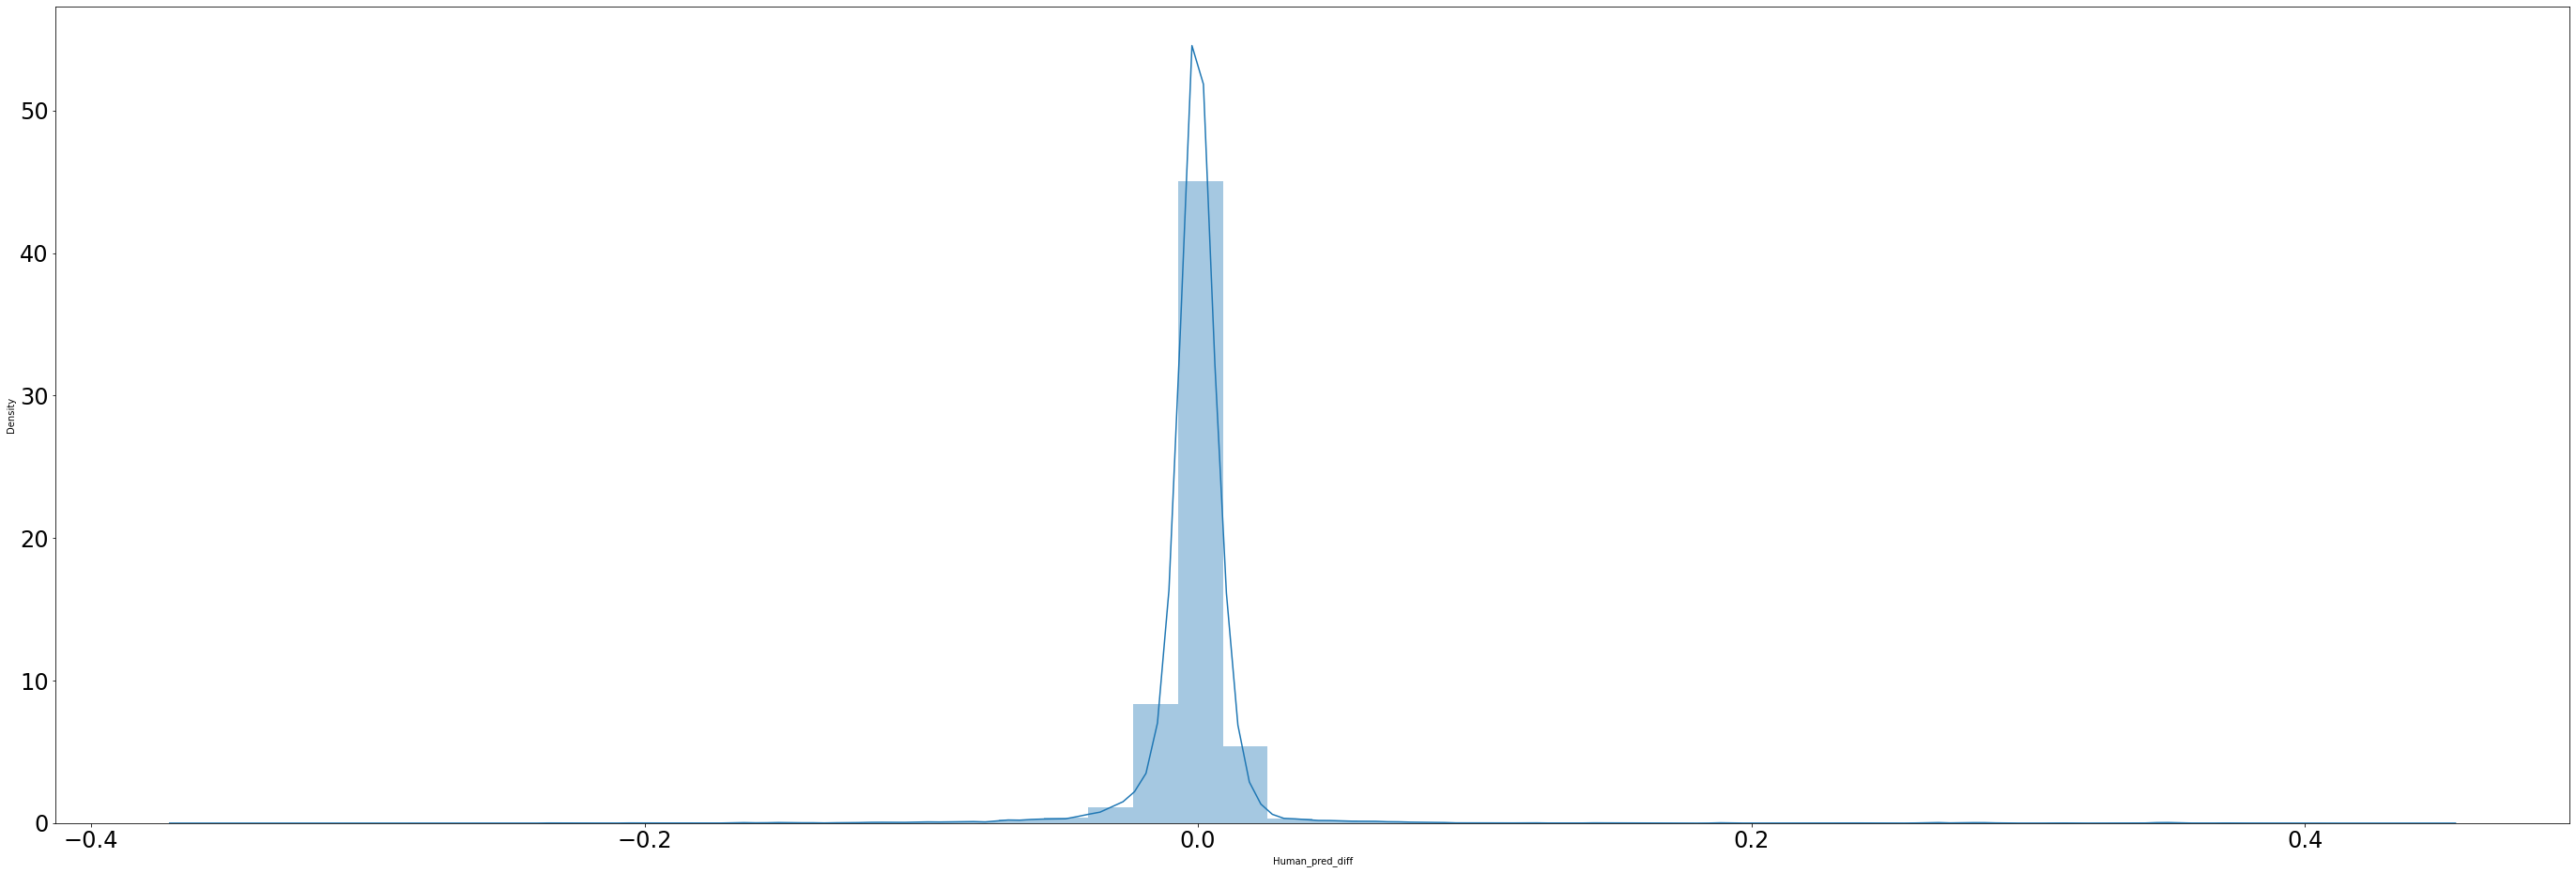

In [9]:
plt.clf()
plt.figure(figsize=(48, 16))
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
sns.distplot(perturbed_output_df["Human_pred_diff"])
plt.show()

In [10]:
n_bins = 12
n = perturbed_output_df.shape[0]
freq, bins = np.histogram(perturbed_output_df[pred_diff_col], bins=n_bins)
hist_map = []
for i in range(n_bins):
    hist_map.append({"start": bins[i], "end":bins[i+1], "count": freq[i], "percentage": freq[i]/n*100})
    
hist_df = pd.DataFrame(hist_map)
hist_df.head(20)

,start,end,count,percentage
0,-0.363682,-0.296167,1,0.003142
1,-0.296167,-0.228652,4,0.012568
2,-0.228652,-0.161137,26,0.081694
3,-0.161137,-0.093622,92,0.289072
4,-0.093622,-0.026107,805,2.529378
5,-0.026107,0.041408,30611,96.182367
6,0.041408,0.108923,188,0.590712
7,0.108923,0.176438,24,0.075410
8,0.176438,0.243953,16,0.050273
9,0.243953,0.311468,32,0.100547


### Top 10 perturbations with highest change in prediction probability

In [11]:
perturbed_output_df.sort_values(by="abs_Human_pred_diff", ascending=False).head(10)

,Cat,Chicken,Chinese rufous horseshoe bat,Ferret,Gray wolf,Horshoe bat,Human,Pig,uniref90_id,y_true,orig_token,perturb_pos,new_token,Human_pred_diff,abs_Human_pred_diff
24896,1.175815e-07,0.000610,0.389009,9.272696e-06,0.000201,0.466031,0.141067,0.003073,WIV04,Human,R,1038,L,0.446498,0.446498
4330,2.736737e-08,0.000118,0.405386,3.949318e-06,0.000064,0.391282,0.200778,0.002368,WIV04,Human,W,1101,H,0.386786,0.386786
14279,6.181376e-08,0.000479,0.354609,5.200513e-06,0.000138,0.434150,0.208494,0.002124,WIV04,Human,K,1037,L,0.379071,0.379071
30601,6.647297e-08,0.000512,0.353331,5.455995e-06,0.000147,0.428319,0.215524,0.002162,WIV04,Human,R,1038,T,0.372041,0.372041
11506,6.389101e-08,0.000495,0.352372,5.305062e-06,0.000141,0.428287,0.216567,0.002133,WIV04,Human,R,1038,P,0.370998,0.370998
14354,6.081316e-08,0.000509,0.348807,5.055856e-06,0.000142,0.425564,0.222892,0.002079,WIV04,Human,R,1038,C,0.364672,0.364672
24978,4.953835e-09,0.000117,0.031778,2.834393e-07,0.000017,0.016701,0.951247,0.000139,WIV04,Human,W,1101,X,-0.363682,0.363682
307,5.931797e-08,0.000499,0.346192,4.917628e-06,0.000139,0.419708,0.231428,0.002031,WIV04,Human,R,1038,S,0.356137,0.356137
5946,6.058617e-08,0.000509,0.344666,4.911151e-06,0.000142,0.420375,0.232308,0.001995,WIV04,Human,R,1038,M,0.355256,0.355256
1755,5.883834e-08,0.000497,0.345236,4.879586e-06,0.000138,0.419023,0.233078,0.002022,WIV04,Human,R,1038,G,0.354487,0.354487


In [12]:
df = perturbed_output_df.pivot(columns="perturb_pos", index="new_token", values=pred_diff_col)
df

perturb_pos,0,1,2,3,4,5,6,7,8,9,...,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272
new_token,,,,,,,,,,,,,,,,,,,,,
A,-0.054671,0.068227,0.010201,-0.005739,-0.005082,0.004032,-0.006630,-0.009437,-0.025716,-0.004032,...,-0.002698,0.001197,0.004624,0.002735,-0.002166,0.005751,0.000392,0.007862,0.005737,-0.000563
B,-0.070851,0.064942,0.011395,0.005355,0.012941,0.021473,0.015377,0.007730,0.000790,0.000313,...,-0.004949,-0.001261,0.002236,0.000085,-0.004840,0.003116,-0.002062,0.005638,0.003721,-0.002291
C,-0.092429,0.060349,0.012983,0.004400,0.015370,0.035590,0.017682,0.009307,0.002750,0.002057,...,-0.015382,-0.009419,-0.005850,-0.009001,-0.017012,-0.007234,-0.013717,-0.003045,-0.005925,-0.010077
D,-0.060761,0.075217,0.023992,0.016208,0.022903,0.033346,0.028896,0.021924,0.022083,0.007977,...,-0.006348,-0.001063,0.001598,-0.000385,-0.004950,0.001689,-0.003593,0.003523,0.002120,-0.003513
E,-0.052232,0.071496,0.020147,0.013387,0.021376,0.034904,0.026183,0.019129,0.018749,0.005540,...,-0.005448,-0.001229,0.002283,-0.000539,-0.005226,0.002200,-0.003190,0.004361,0.003082,-0.002048
F,-0.279391,NaN,0.013918,NaN,0.003185,0.039141,0.005048,-0.001909,-0.007454,-0.000379,...,-0.002570,0.001467,0.004167,0.003339,-0.001920,0.005141,-0.000457,0.007700,0.006285,-0.000949
G,-0.065420,0.054859,-0.008941,-0.021643,-0.018799,-0.008643,-0.015503,-0.018905,-0.031617,-0.013274,...,-0.003741,-0.000309,0.002034,NaN,-0.004493,0.003091,-0.001288,0.005389,0.005045,-0.002067
H,-0.082177,0.063002,0.008811,0.004687,0.008533,0.016105,0.012559,0.005449,0.003888,0.000228,...,-0.009020,-0.005918,-0.001547,-0.005355,-0.009493,-0.002151,-0.007454,NaN,-0.001549,-0.007663
I,-0.072110,0.057774,-0.001676,-0.012941,-0.008304,0.009457,-0.010107,-0.010599,-0.019227,-0.004806,...,-0.002315,0.001248,0.004461,0.003354,-0.002838,0.005326,-0.000025,0.008360,0.005672,-0.001349


<Figure size 432x288 with 0 Axes>

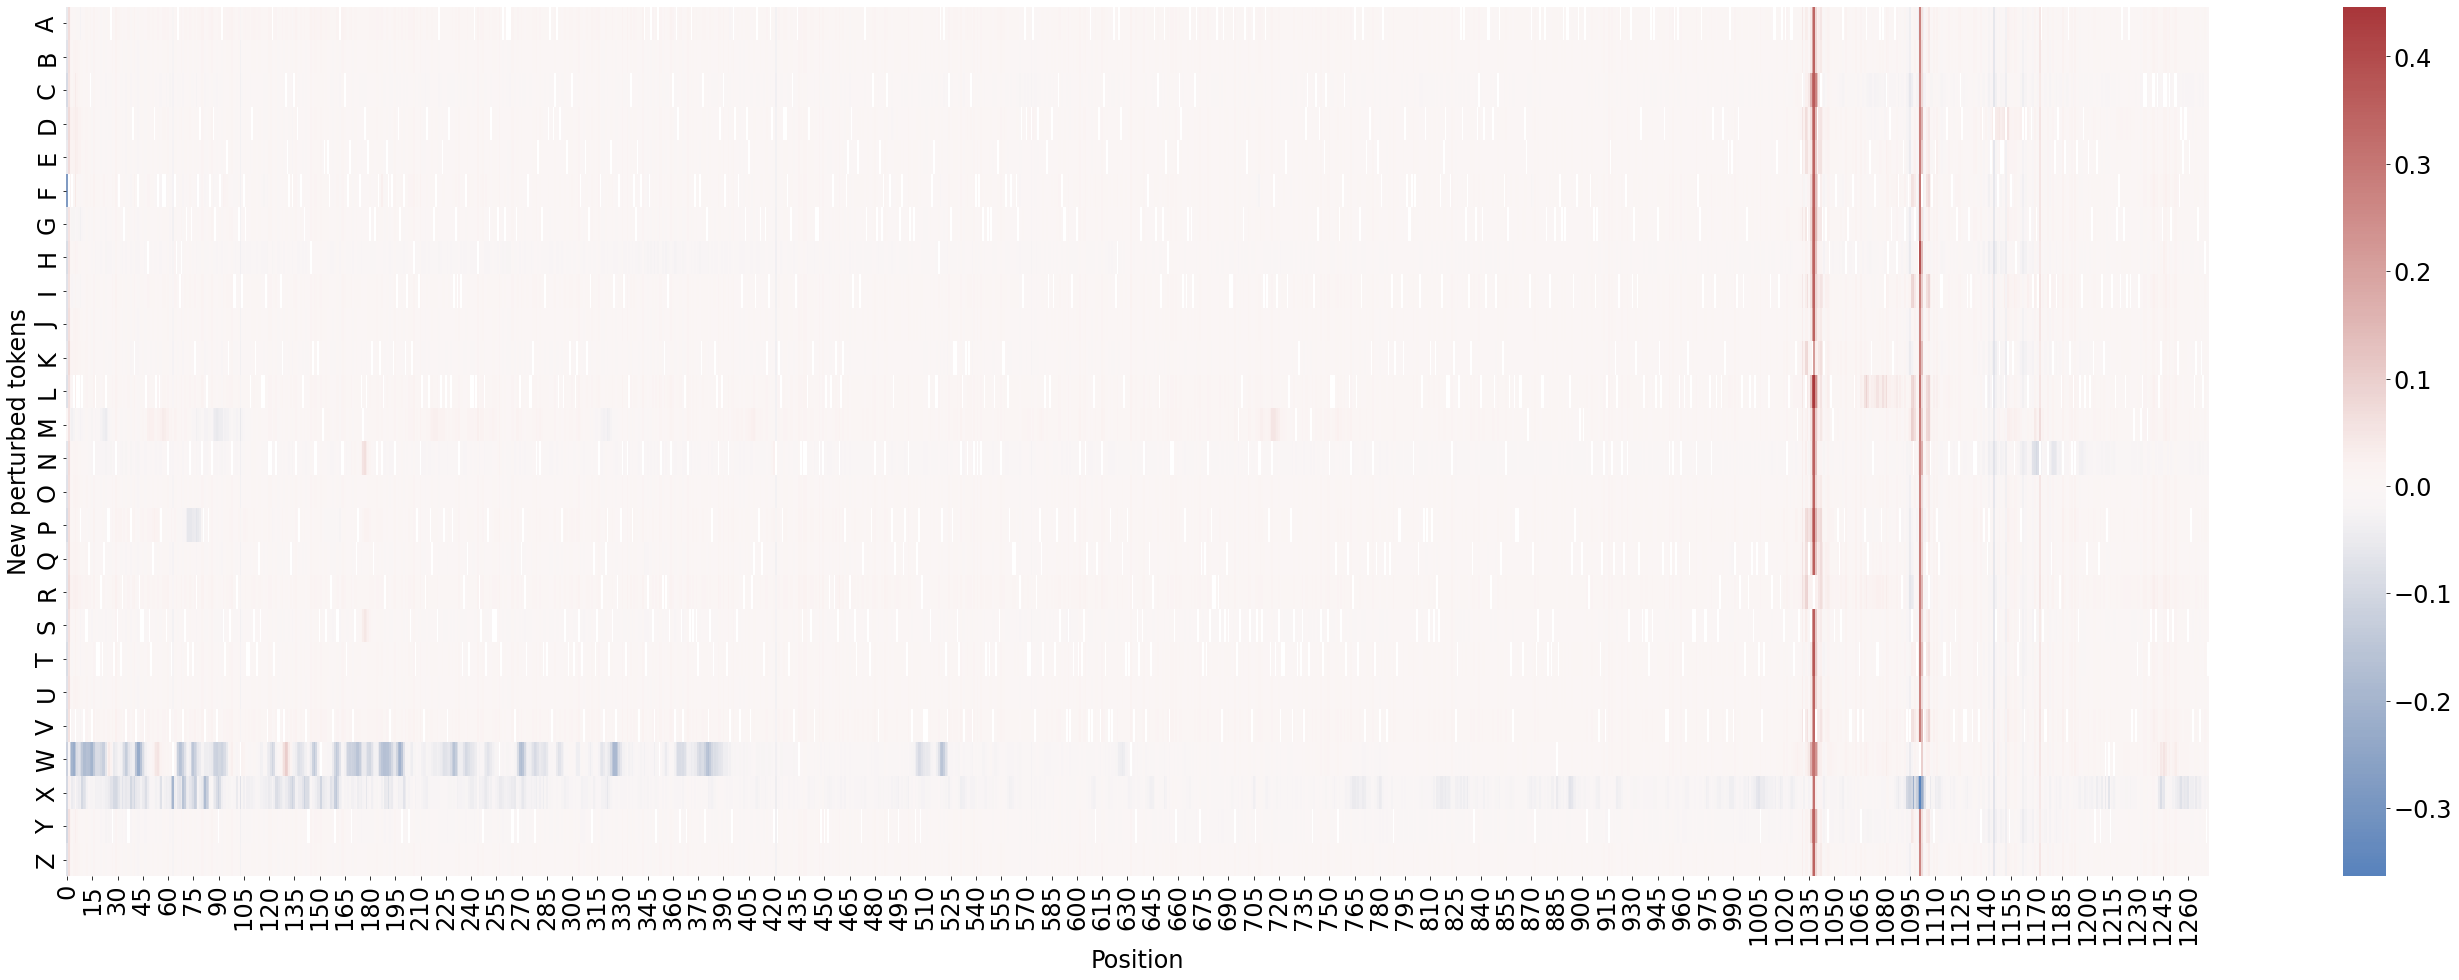

In [13]:
plt.clf()
plt.figure(figsize=(48, 16))
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
# plt.rcParams['figure.autolayout'] = True
ax = sns.heatmap(df, cmap=cmap, center=0)
plt.xlabel('Position', fontsize=24)
plt.ylabel('New perturbed tokens', fontsize=24)
plt.show()

In [14]:
df.mean(axis=0)

perturb_pos
0      -0.079584
1       0.060409
2       0.003865
3      -0.009179
4      -0.003645
          ...   
1268    0.001492
1269   -0.003307
1270    0.004217
1271    0.002696
1272   -0.003784
Length: 1273, dtype: float64

<Figure size 432x288 with 0 Axes>

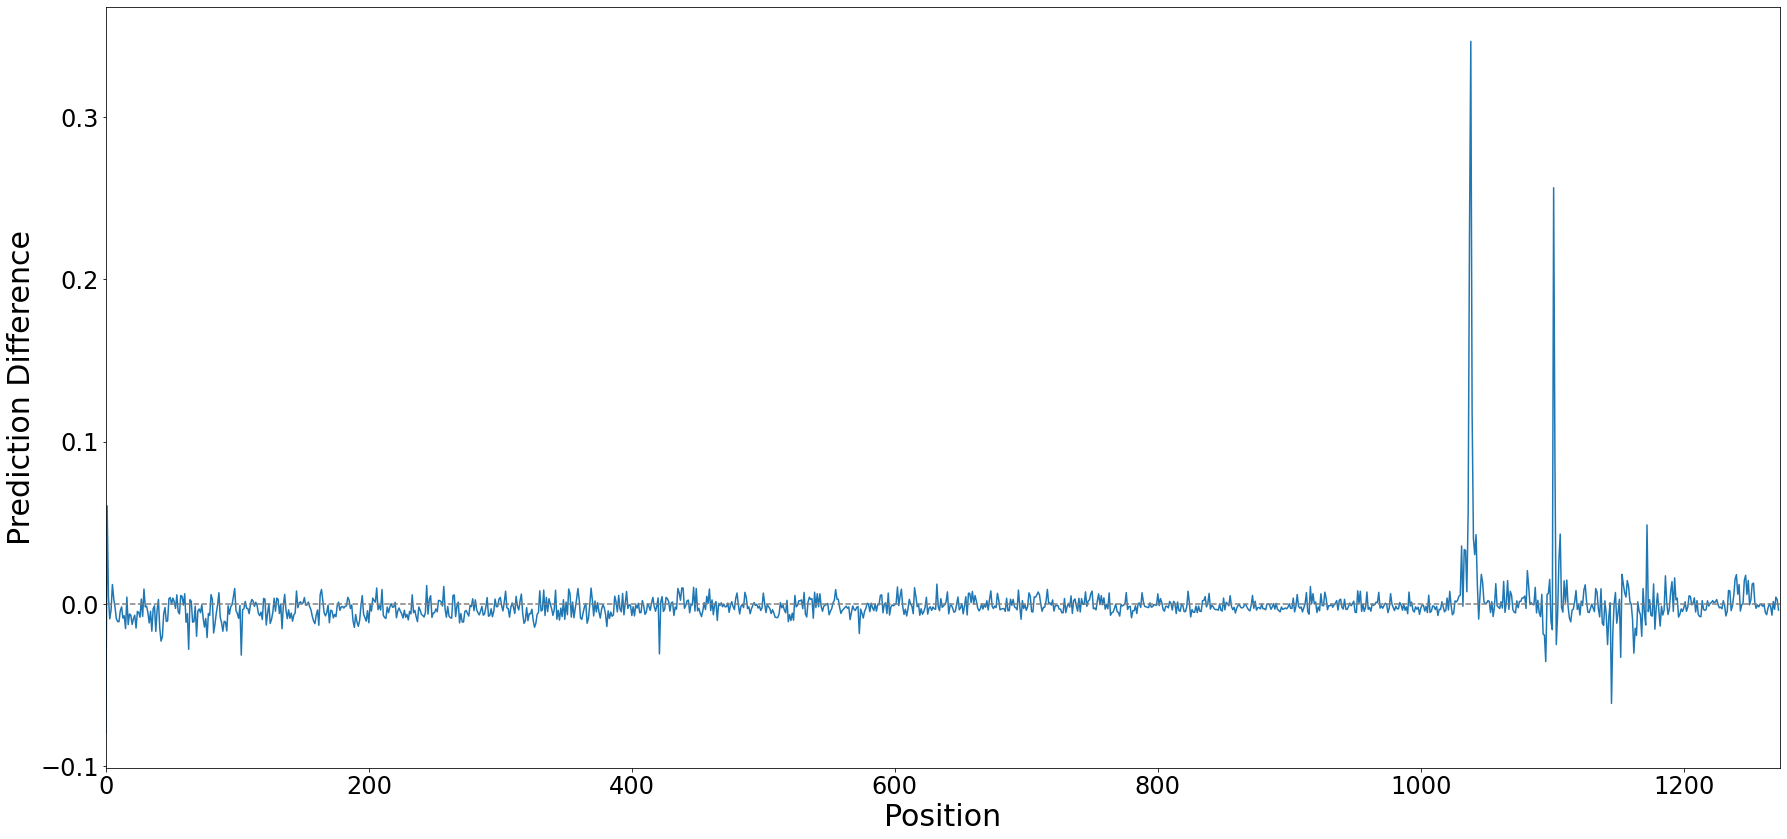

In [15]:
plt.clf()
plt.figure(figsize=(30, 14))
ax = sns.lineplot(df.mean(axis=0))
ax.axhline(0.0, color="gray", linestyle="--")
plt.rcParams['xtick.labelsize'] = 30
plt.rcParams['ytick.labelsize'] = 30
plt.xlabel('Position', fontsize=30)
plt.ylabel('Prediction Difference', fontsize=30)
ax.set_xlim(0, 1273)
plt.show()